# 读取数据

In [13]:
import os, shutil
# The path to the directory where the original


# The directory where we will
# store our smaller dataset（保存较小数据集的目录）
base_dir = 'data/cats_and_dogs_small'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Directories for our training, validation and test asplits
#（分别对应划分后的训练、 验证和测试的目录）
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
# Directory with our training cat pictures(猫的训练图像目录)
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with our training dog pictures(狗的训练图像目录)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    # Directory with our validation cat pictures(猫的验证图像目录)
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures(狗的验证图像目录)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)
    
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)
    # Directory with our test cat pictures（猫的测试图像目录）
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with our test dog pictures（狗的测试图像目录）
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)


In [14]:
# dataset was uncompressed（原始数据集解压目录的路径）
original_dataset_dir = r'data\dogs-vs-cats\train\train'

# Copy first 1000 cat images to train_cats_dir（将前 1000 张猫的图像复制 到 train_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir（将 接 下 来 500 张 猫 的 图像 复 制到 validation_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir（将 接 下 来的 500 张 猫 的 图像 复制到 test_cats_dir）
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir（将前 1000 张狗的图像复制 到 train_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir（将接下来 500 张狗的图像复 制到 validation_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir（将接下来 500 张狗的图像复制到 test_dogs_dir）
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [4]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [5]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [6]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [7]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [8]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


![jupyter](image/cats_vs_dogs_samples.jpg)

# 构建网络

网络中特征图的深度在逐渐增大（从 32 增大到 128），而特征图的尺寸在逐渐减小（从148×148 减小到 7×7）。这几乎是所有卷积神经网络的模式。

In [9]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

使用 RMSprop 优化器。因为网络最后一层是单一 sigmoid 单元，所以我们将使用二元交叉熵作为损失函数

In [11]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# Data preprocessing

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255（将所有图像乘以 1/255 缩放）
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory（目标目录）
        train_dir,
        # All images will be resized to 150x150（将所有图像的大小调整为 150×150）
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels（因为使用了 binary_crossentropy损失，所以需要用二进制标签）
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
#从生成器中抽取 steps_per_epoch 个批量后（即运行了 steps_per_epoch 次梯度下降），拟合过程
#将进入下一个轮次。本例中，每个批量包含 20 个样本，所以读取完所有 2000 个样本需要 100个批量。
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 4s 35ms/step - loss: 0.4640 - acc: 0.7785 - val_loss: 0.5524 - val_acc: 0.7100
Epoch 2/30
100/100 [==============================] - 4s 36ms/step - loss: 0.4347 - acc: 0.8025 - val_loss: 0.5627 - val_acc: 0.7150
Epoch 3/30
100/100 [==============================] - 4s 37ms/step - loss: 0.4143 - acc: 0.8125 - val_loss: 0.6105 - val_acc: 0.6850
Epoch 4/30
100/100 [==============================] - 4s 36ms/step - loss: 0.3896 - acc: 0.8230 - val_loss: 0.5788 - val_acc: 0.7010
Epoch 5/30
100/100 [==============================] - 4s 36ms/step - loss: 0.3657 - acc: 0.8395 - val_loss: 0.5466 - val_acc: 0.7210
Epoch 6/30
100/100 [==============================] - 4s 35ms/step - loss: 0.3428 - acc: 0.8490 - val_loss: 0.5674 - val_acc: 0.7210
Epoch 7/30
100/100 [==============================] - 4s 36ms/step - loss: 0.3186 - acc: 0.8735 - val_loss: 0.6040 - val_acc: 0.7210
Epoch 8/30
100/100 [==============================] - 4s 35ms/step - 

In [ ]:
model.save('cats_and_dogs_small_1.h5')

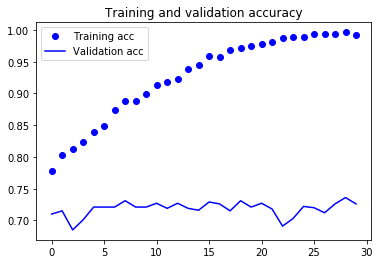

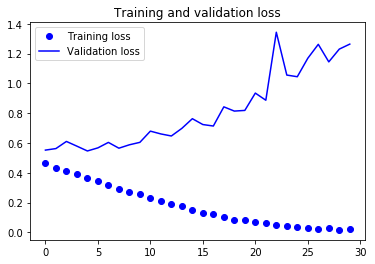

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# 使用数据增强 (Using data augmentation)

过拟合的原因是学习样本太少，导致无法训练出能够泛化到新数据的模型。如果拥有无限的数据，那么模型能够观察到数据分布的所有内容，这样就永远不会过拟合。数据增强是从现有的训练样本中生成更多的训练数据，其方法是利用多种能够生成可信图像的随机变换来增加（augment）样本。其目标是，模型在训练时不会两次查看完全相同的图像。这让模型能够观察到数据的更多内容，从而具有更好的泛化能力。

In [17]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

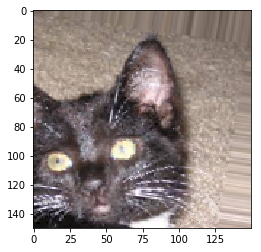

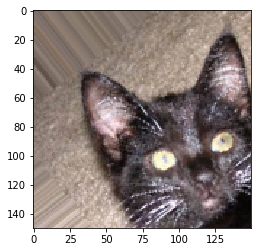

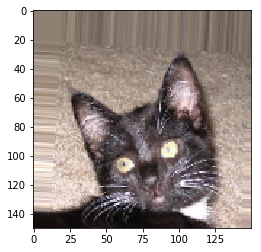

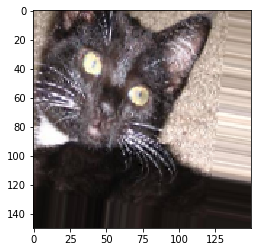

In [18]:
# This is module with image preprocessing utilities（图像预处理工具的模块）
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"（选择一张图像进行增强）
img_path = fnames[5]

# Read the image and resize it（读取图像并调整大小）
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)（将其转换为形状 (150, 150, 3) 的 Numpy 数组）
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)（将其形状改变为 (1, 150, 150, 3)）
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
#生成随机变换后的图像批量。 循环是无限的，因此你需要在某个时刻终止循环
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!（注意，不能增强验证数据）
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory（目标目录）
        train_dir,
        # All images will be resized to 150x150（将所有图像的大小调整为 150×150）
        target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        #（因为使用了 binary_crossentropy损失，所以需要用二进制标签）
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
 63/100 [=================>............] - 27s 425ms/step - loss: 0.6961 - acc: 0.5105 - val_loss: 0.6880 - val_acc: 0.5880


In [25]:
model.save('cats_and_dogs_small_2.h5')

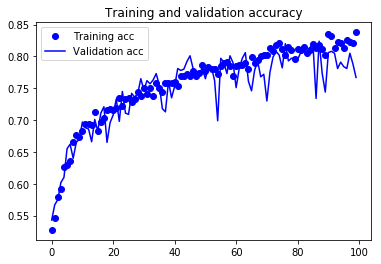

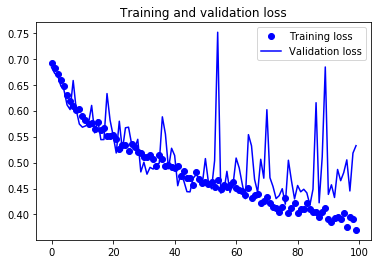

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 使用预训练的卷积神经网络

预训练网络（pretrained network）是一个保存好的网络，之前已在大型数据集（通常是大规模图像分类任务）上训练好。如果这个原始数据集足够大且足够通用，那么预训练网络学到的特征的空间层次结构可以有效地作为视觉世界的通用模型，因此这些特征可用于各种不同的计算机视觉问题，即使这些新问题涉及的类别和原始任务完全不同。

## Feature extraction

特征提取是使用之前网络学到的表示来从新样本中提取出有趣的特征。然后将这些特征输入一个新的分类器，从头开始训练。用于图像分类的卷积神经网络包含两部分：首先是一系列池化层和卷积层，最后是一个密集连接分类器。第一部分叫作模型的卷积基（convolutional base）。对于卷积神经网络而言，特征提取就是取出之前训练好的网络的卷积基，在上面运行新数据，然后在输出上面 训练一个新的分类器

![jupyter](image/swapping_fc_classifier.png)

In [22]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [23]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [24]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'data/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            #注意，这些生成器在循环中不断生成数据，所以你必须在读取完所有图像后终止循环
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

定义密集连接分类器（使用 dropout 正则化），并在刚刚保存的数据和标签上训练这个分类器。

In [26]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 0s 4ms/step - loss: 0.6264 - acc: 0.6570 - val_loss: 0.4545 - val_acc: 0.8060
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4388 - acc: 0.7920 - val_loss: 0.3660 - val_acc: 0.8670
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3607 - acc: 0.8365 - val_loss: 0.3271 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3020 - acc: 0.8770 - val_loss: 0.3021 - val_acc: 0.8870
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2874 - acc: 0.8850 - val_loss: 0.2908 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2633 - acc: 0.8925 - val_loss: 0.2811 - val_acc: 0.8900
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2444 - acc: 0.9065 - val_loss: 0.2659 - val_acc: 0.8940
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

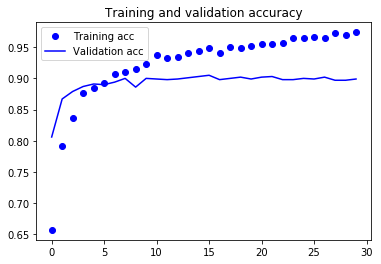

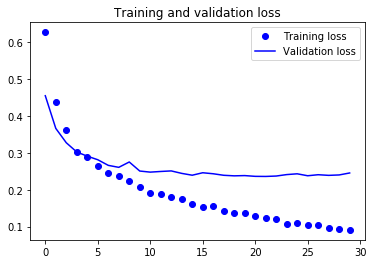

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [38]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 10


In [39]:
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [40]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
# 注意，不能增强验证数据
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory（目标目录）
        train_dir,
        # All images will be resized to 150x150（将所有图像的大小调整为 150×150）
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
#         因为使用了 binary_crossentropy损失，所以需要用二进制标签
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 - 15s - loss: 0.5998 - acc: 0.6820 - val_loss: 0.4557 - val_acc: 0.8090
Epoch 2/30
100/100 - 15s - loss: 0.4870 - acc: 0.7910 - val_loss: 0.3728 - val_acc: 0.8510
Epoch 3/30
100/100 - 15s - loss: 0.4304 - acc: 0.8180 - val_loss: 0.3335 - val_acc: 0.8660
Epoch 4/30
100/100 - 15s - loss: 0.4169 - acc: 0.8145 - val_loss: 0.3143 - val_acc: 0.8680
Epoch 5/30
100/100 - 15s - loss: 0.3886 - acc: 0.8340 - val_loss: 0.2932 - val_acc: 0.8770
Epoch 6/30
100/100 - 15s - loss: 0.3783 - acc: 0.8260 - val_loss: 0.2840 - val_acc: 0.8840
Epoch 7/30
100/100 - 15s - loss: 0.3523 - acc: 0.8550 - val_loss: 0.2757 - val_acc: 0.8820
Epoch 8/30
100/100 - 15s - loss: 0.3585 - acc: 0.8395 - val_loss: 0.2700 - val_acc: 0.8810
Epoch 9/30
100/100 - 15s - loss: 0.3441 - acc: 0.8490 - val_loss: 0.2816 - val_acc: 0.8840
Epoch 10/30
100/100 - 15s - loss: 0.3318 - acc: 0.8510 - val_loss: 0.2591 - val_acc: 0.8910
Epoch

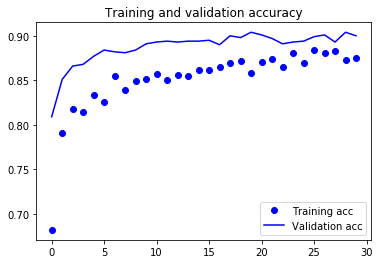

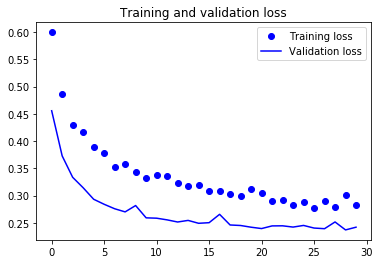

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 微调模型(Fine-tuning)

于用于特征提取的冻结的模型基，微调是指将其顶部的几层“解冻”，并将这解冻的几层和新增加的部分（本例中是全连接分类器）联合训练

In [43]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [44]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
100/100 [==============================] - 15s 152ms/step - loss: 0.2842 - acc: 0.8805 - val_loss: 0.2233 - val_acc: 0.9050
Epoch 2/100
100/100 [==============================] - 15s 152ms/step - loss: 0.2519 - acc: 0.8905 - val_loss: 0.2597 - val_acc: 0.9020
Epoch 3/100
100/100 [==============================] - 15s 151ms/step - loss: 0.2473 - acc: 0.9035 - val_loss: 0.2041 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 15s 152ms/step - loss: 0.2370 - acc: 0.8995 - val_loss: 0.1953 - val_acc: 0.9200
Epoch 5/100
 63/100 [=================>............] - ETA: 4s - loss: 0.2031 - acc: 0.9167

KeyboardInterrupt: 

In [42]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.8999999761581421


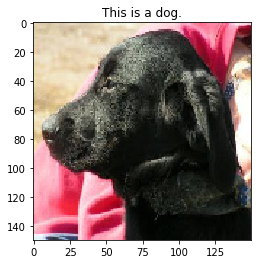

In [57]:
fnames_cats = [os.path.join(test_cats_dir, fname) for fname in os.listdir(test_cats_dir)]
fnames_dogs = [os.path.join(test_dogs_dir, fname) for fname in os.listdir(test_dogs_dir)]

img_path = fnames_dogs[39]
# Read the image and resize it（读取图像并调整大小）
img = image.load_img(img_path, target_size=(150, 150))
# Convert it to a Numpy array with shape (150, 150, 3)（将其转换为形状 (150, 150, 3) 的 Numpy 数组）

def image_predict(img):
    x = image.img_to_array(img)
    x = x.reshape((1,) + x.shape)
    plt.imshow(img)
    predictions = int(model.predict(x))
    if predictions > 0:
        title = 'This is a dog.'
    else:
        title = 'This is a cat.'
    plt.title(title)
    plt.axis('off')
    plt.show()

# 结语

* 卷积神经网络是用于计算机视觉任务的最佳机器学习模型。即使在非常小的数据集上也可以从头开始训练一个卷积神经网络，而且得到的结果还不错。
* 在小型数据集上的主要问题是过拟合。在处理图像数据时，数据增强是一种降低过拟合的强大方法。
* 利用特征提取，可以很容易将现有的卷积神经网络复用于新的数据集。对于小型图像数据集，这是一种很有价值的方法。
* 作为特征提取的补充，可以使用微调，将现有模型之前学到的一些数据表示应用于新问题。这种方法可以进一步提高模型性能。

![jupyter](image/AI_unknow.jpg)

![jupyter](image/sloth.jpg)